
Correlation Matrix:
           CO2_confs  CO2_conff
CO2_confs   1.000000   0.874505
CO2_conff   0.874505   1.000000


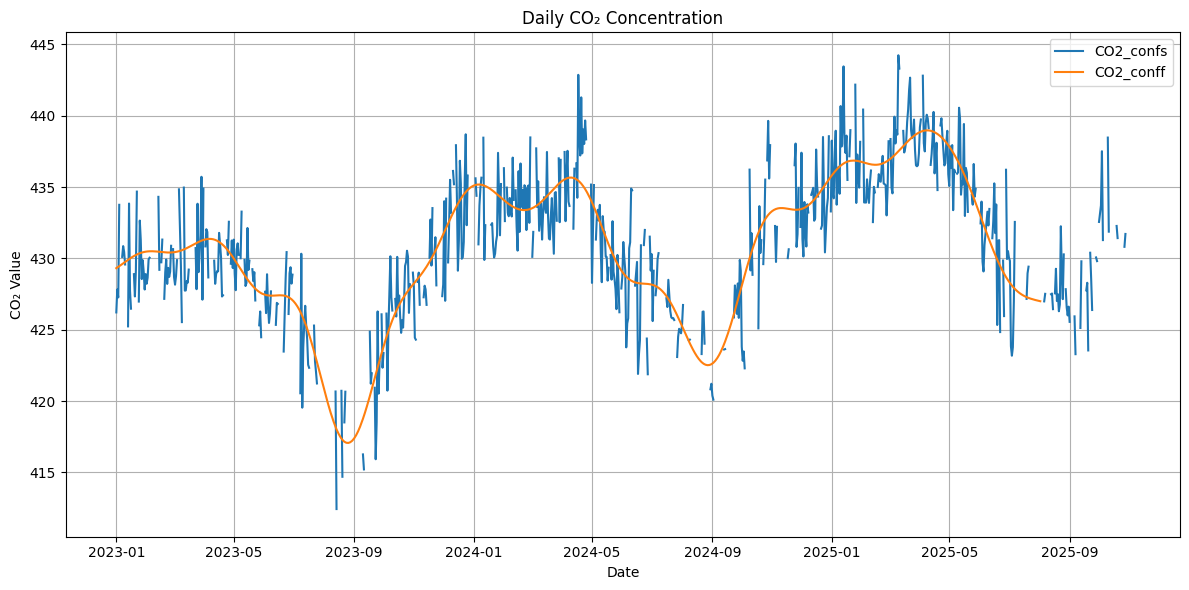

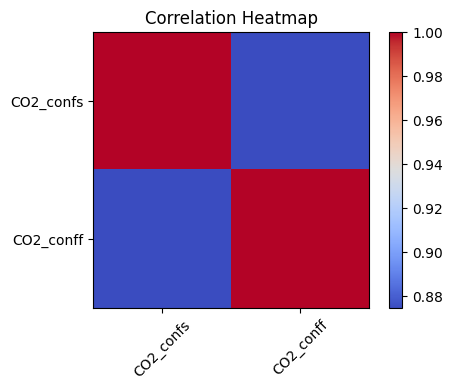

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 1. API request
url = "https://climate.go.kr/atlas/am/am/co2"
payload = {
    "locations": ["132"],
    "dateType": "D",
    "startDate": "2023-01-01",
    "endDate": "2025-11-18"
}
headers = {"Content-Type": "application/json"}

response = requests.post(url, json=payload, headers=headers)
raw_json = response.json()

# 2. JSON structure: {"132": [ {...}, {...} ]}
#    → flatten: extract the list under the key "132"
data_list = raw_json["132"]

# 3. Convert to DataFrame
df = pd.DataFrame(data_list)

# 4. Convert date column
df["OBS_DATE"] = pd.to_datetime(df["OBS_DATE"])

# 5. Select numeric columns
numeric_cols = ["CO2_confs", "CO2_conff"]
numeric_df = df[numeric_cols]

# 6. Correlation matrix
print("\nCorrelation Matrix:")
print(numeric_df.corr())

# 7. Line plot
plt.figure(figsize=(12, 6))
plt.plot(df["OBS_DATE"], df["CO2_confs"], label="CO2_confs")
plt.plot(df["OBS_DATE"], df["CO2_conff"], label="CO2_conff")
plt.title("Daily CO₂ Concentration")
plt.xlabel("Date")
plt.ylabel("CO₂ Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Heatmap
corr = numeric_df.corr()

plt.figure(figsize=(5, 4))
plt.imshow(corr, cmap="coolwarm", interpolation='nearest')
plt.title("Correlation Heatmap")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# 1. CO2 DATA (REAL API)
# --------------------------
co2_url = "https://climate.go.kr/atlas/am/am/co2"
payload = {
    "locations": ["132"],
    "dateType": "D",
    "startDate": "2023-01-01",
    "endDate": "2025-11-18"
}
headers = {"Content-Type": "application/json"}

response = requests.post(co2_url, json=payload, headers=headers)
co2_json = response.json()

# JSON → DataFrame
co2_df = pd.DataFrame(co2_json["data"])
co2_df["date"] = pd.to_datetime(co2_df["date"])
co2_df["co2"] = pd.to_numeric(co2_df["co2"], errors="coerce")

# --------------------------
# 2. TRAFFIC DATA (MOCK / REPLACE WITH API)
# --------------------------
traffic_df = pd.DataFrame({
    "date": co2_df["date"],
    "traffic_volume": np.random.randint(500, 5000, len(co2_df))
})

# --------------------------
# 3. ELECTRICITY USAGE DATA (MOCK / REPLACE WITH API)
# --------------------------
elec_df = pd.DataFrame({
    "date": co2_df["date"],
    "electricity_kwh": np.random.randint(200, 2000, len(co2_df))
})

# --------------------------
# 4. MERGE ALL DATA
# --------------------------
df = co2_df.merge(traffic_df, on="date").merge(elec_df, on="date")

# --------------------------
# 5. CORRELATION MATRIX
# --------------------------
corr = df[["co2", "traffic_volume", "electricity_kwh"]].corr()
print("\n--- CORRELATION MATRIX ---")
print(corr)

# --------------------------
# 6. CORRELATION HEATMAP
# --------------------------
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap: CO2 vs Traffic vs Electricity")
plt.show()

# --------------------------
# 7. CO2 TREND PLOT
# --------------------------
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["co2"])
plt.title("Daily CO2 Emission Trend")
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.tight_layout()
plt.show()

# --------------------------
# 8. DECISION-MAKING LOGIC
# --------------------------
high_corr_traffic = corr.loc["co2", "traffic_volume"]
high_corr_elec = corr.loc["co2", "electricity_kwh"]

print("\n--- AI DECISION ENGINE ---")

if high_corr_traffic > 0.6:
    print("🔴 CO2 is strongly linked with TRAFFIC → Recommend traffic reduction policies.")
elif high_corr_traffic > 0.3:
    print("🟡 Medium correlation with TRAFFIC → Consider optimizing peak hours.")
else:
    print("🟢 Traffic impact is low.")

if high_corr_elec > 0.6:
    print("🔴 CO2 strongly depends on ELECTRICITY USAGE → Switch to renewable energy sources.")
elif high_corr_elec > 0.3:
    print("🟡 Medium correlation → Promote building efficiency.")
else:
    print("🟢 Electricity impact is low.")

KeyError: 'data'

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://climate.go.kr/atlas/am/am/co2"

response = requests.get(url)
json_data = response.json()

# 1️⃣ CO2 data listini olish
co2_list = json_data["CO2"]

# 2️⃣ DataFrame ga aylantirish
df = pd.DataFrame(co2_list)

# 3️⃣ Sanani datetime ga o‘tkazish
df["OBS_DATE"] = pd.to_datetime(df["OBS_DATE"])

# 4️⃣ Faqat CO2_sdata ni numeric qilish
df["CO2_sdata"] = pd.to_numeric(df["CO2_sdata"], errors="coerce")

print("Clean DataFrame:")
print(df)

# 5️⃣ Plot chizish
plt.figure(figsize=(12, 6))
plt.plot(df["OBS_DATE"], df["CO2_sdata"])
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("Daily CO2 Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6️⃣ Korrelyatsiya
corr = df[["CO2_sdata"]].corr()
print("\nCorrelation Matrix:")
print(corr)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://climate.go.kr/atlas/am/am/co2"
payload = {
    "locations": ["132"],
    "dateType": "D",
    "startDate": "2023-01-01",
    "endDate": "2025-11-18"
}
headers = {"Content-Type": "application/json"}

response = requests.post(url, json=payload, headers=headers)
data_json = response.json()

# JSON → DataFrame
df = pd.DataFrame(data_json["data"])

# Convert date
df["OBS_DATE"] = pd.to_datetime(df["OBS_DATE"])

# Convert numeric columns
df["CO2_confs"] = pd.to_numeric(df["CO2_confs"], errors="coerce")
df["CO2_sdata"] = pd.to_numeric(df["CO2_sdata"], errors="coerce")

# Correlation
corr = df[["CO2_confs", "CO2_sdata"]].corr()

print("Correlation Matrix:")
print(corr)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["OBS_DATE"], df["CO2_confs"], label="CO2_confs (forecast)")
plt.plot(df["OBS_DATE"], df["CO2_sdata"], label="CO2_sdata (sensor)", linestyle='--')
plt.xlabel("Date")
plt.ylabel("CO2 Concentration")
plt.title("Daily CO2 Levels (Forecast vs Sensor)")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'data'

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://climate.go.kr/atlas/am/am/co2"

response = requests.get(url)
json_data = response.json()

# 1️⃣ CO2 data listini olish
co2_list = json_data["CO2"]

# 2️⃣ DataFrame ga aylantirish
df = pd.DataFrame(co2_list)

# 3️⃣ Sanani datetime ga o‘tkazish
df["OBS_DATE"] = pd.to_datetime(df["OBS_DATE"])

# 4️⃣ Faqat CO2_sdata ni numeric qilish
df["CO2_sdata"] = pd.to_numeric(df["CO2_sdata"], errors="coerce")

print("Clean DataFrame:")
print(df)

# 5️⃣ Plot chizish
plt.figure(figsize=(12, 6))
plt.plot(df["OBS_DATE"], df["CO2_sdata"])
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("Daily CO2 Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6️⃣ Korrelyatsiya
corr = df[["CO2_sdata"]].corr()
print("\nCorrelation Matrix:")
print(corr)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)